# Extract patches from fully sky healpix sims

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#folders
import sys, os

In [3]:
import numpy as np, re, healpy as H, glob
import scipy.ndimage as ndimage
from pylab import *

In [4]:
rcParams['figure.dpi'] = 150
rcParams['figure.facecolor'] = 'white'

In [7]:
reso_arcmin = 0.5
#ny, nx = 1560, 1560
boxsize = 1560
tcmb = 2.73 #K
which_sim = 'amber'
proj = 0

if which_sim == 'amber':
    sim_fd = '/home/sri/analysis/2020_07/ksz_ps/maps/mapmaking/3G/ksz_4pt_and_others/sims/AMBER/src/Nm1d512_box1000_ionfrac0.05-0.95_z5-40-0.2_nside8192/for_sim_comparisons_ksz/seed1/'
    op_fd = 'amber/Nm1d512_box1000_ionfrac0.05-0.95_z5-40-0.2_nside8192/for_sim_comparisons_ksz/seed1/'
    searchstr = '%s/*/cmb/map_ksz_nside=8192.fits' %(sim_fd)
    ra0, dec0 = 352.5, -55.
elif which_sim == '21cmfast':
    sim_fd = '21cmFAST/'
    op_fd = sim_fd
    searchstr = '%s/maps/*.fits' %(sim_fd)
    ra0, dec0 = 0., 90.

In [14]:
spt3g_folder = '/sptlocal/user/sri/spt3g/spt3g_software/'
if not os.path.exists(spt3g_folder):
    spt3g_folder = '/home/srinirag/projects_caps/spt3g_software_collection/spt3g_software_py3_v4/spt3g_software'
builddir = '%sbuild' %(spt3g_folder)
sys.path.append(builddir)
import spt3g
from spt3g import core
from spt3g.simulations import foregrounds as fg
from spt3g.mapspectra import basicmaputils as utils
from spt3g.mapspectra import map_analysis
from spt3g import maps
from spt3g.beams import beam_analysis as beam_stuff
from spt3g.simulations import cmb
from spt3g.ilc import ilc

def extract_cutouts(hmap, reso_arcmin = 0.5, ny = 1560, nx = 1560, proj = 0, ra0 = 352.5, dec0 = -55, remove_mean = False, convert_units = True):
    
    #create a map stub
    map_stub = maps.FlatSkyMap(
        nx, ny, 
        reso_arcmin*core.G3Units.arcmin, 
        weighted = False, 
        proj = spt3g.maps.MapProjection(proj),
        alpha_center = ra0*core.G3Units.degrees, 
        delta_center = dec0*core.G3Units.degrees,
        coord_ref=maps.MapCoordReference.Equatorial, 
        units = spt3g.core.G3TimestreamUnits.Tcmb, 
        pol_type=maps.MapPolType.T)
    
    if remove_mean:
        hmap = hmap - np.mean( hmap ) #remove mean

    if convert_units:
        hmap = hmap / 1e6 #in kelvin now
        hmap = hmap * core.G3Units.kelvin #now in milli kelvin
    
    t_map = maps.maputils.healpix_to_flatsky(hmap, map_stub=map_stub, interp=True)
    
    return np.asarray( t_map )

/home/sri/analysis/2020_07/ksz_ps/maps/mapmaking/3G/ksz_4pt_and_others/sims/AMBER/src/Nm1d512_box1000_ionfrac0.05-0.95_z5-40-0.2_nside8192/for_sim_comparisons_ksz/seed1//*/cmb/map_ksz_nside=8192.fits

Toal files = 10

/home/sri/analysis/2020_07/ksz_ps/maps/mapmaking/3G/ksz_4pt_and_others/sims/AMBER/src/Nm1d512_box1000_ionfrac0.05-0.95_z5-40-0.2_nside8192/for_sim_comparisons_ksz/seed1/zre7.74086_Dz4.36283_Az2.5_M1e+08_lamb3_nside8192/cmb/map_ksz_nside=8192.fits
	amber/Nm1d512_box1000_ionfrac0.05-0.95_z5-40-0.2_nside8192/for_sim_comparisons_ksz/seed1/zre7.74086_Dz4.36283_Az2.5_M1e+08_lamb3_nside8192/cmb/map_ksz_nside=8192.npy


<Figure size 900x600 with 0 Axes>

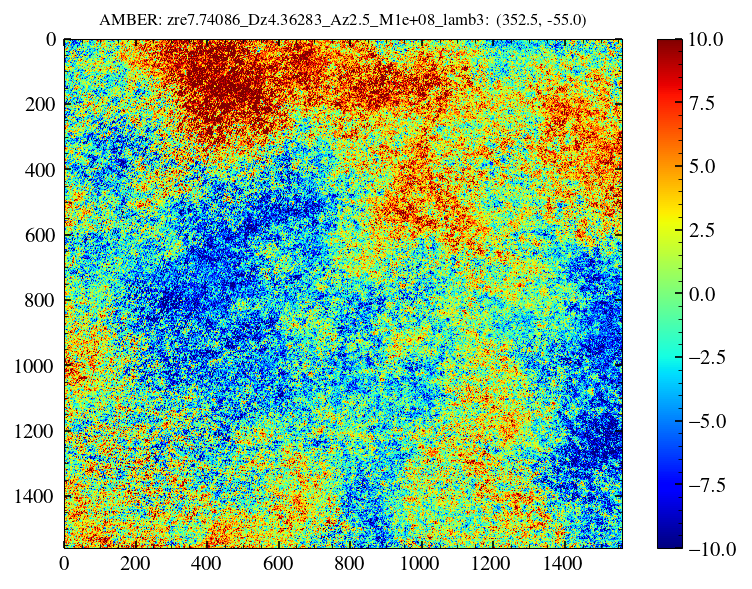

/home/sri/analysis/2020_07/ksz_ps/maps/mapmaking/3G/ksz_4pt_and_others/sims/AMBER/src/Nm1d512_box1000_ionfrac0.05-0.95_z5-40-0.2_nside8192/for_sim_comparisons_ksz/seed1/zre7.74086_Dz4.36283_Az2_M1e+08_lamb3_nside8192/cmb/map_ksz_nside=8192.fits
	amber/Nm1d512_box1000_ionfrac0.05-0.95_z5-40-0.2_nside8192/for_sim_comparisons_ksz/seed1/zre7.74086_Dz4.36283_Az2_M1e+08_lamb3_nside8192/cmb/map_ksz_nside=8192.npy


<Figure size 900x600 with 0 Axes>

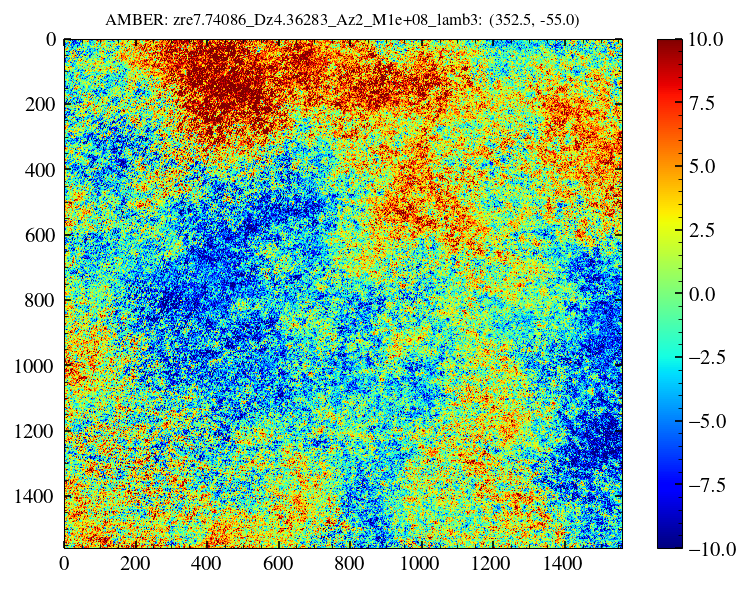

/home/sri/analysis/2020_07/ksz_ps/maps/mapmaking/3G/ksz_4pt_and_others/sims/AMBER/src/Nm1d512_box1000_ionfrac0.05-0.95_z5-40-0.2_nside8192/for_sim_comparisons_ksz/seed1/zre8.09399_Dz6.07768_Az2.5_M1e+08_lamb3_nside8192/cmb/map_ksz_nside=8192.fits
	amber/Nm1d512_box1000_ionfrac0.05-0.95_z5-40-0.2_nside8192/for_sim_comparisons_ksz/seed1/zre8.09399_Dz6.07768_Az2.5_M1e+08_lamb3_nside8192/cmb/map_ksz_nside=8192.npy


<Figure size 900x600 with 0 Axes>

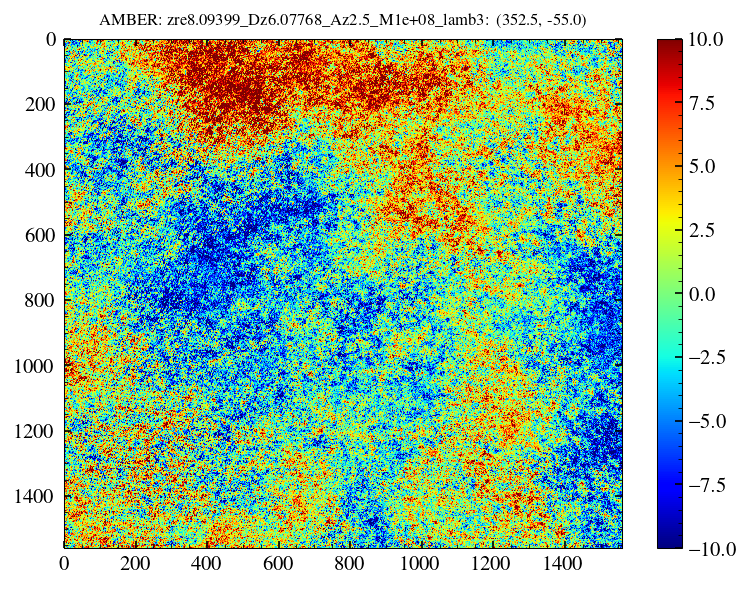

/home/sri/analysis/2020_07/ksz_ps/maps/mapmaking/3G/ksz_4pt_and_others/sims/AMBER/src/Nm1d512_box1000_ionfrac0.05-0.95_z5-40-0.2_nside8192/for_sim_comparisons_ksz/seed1/zre8.09399_Dz6.07768_Az2_M1e+08_lamb3_nside8192/cmb/map_ksz_nside=8192.fits
	amber/Nm1d512_box1000_ionfrac0.05-0.95_z5-40-0.2_nside8192/for_sim_comparisons_ksz/seed1/zre8.09399_Dz6.07768_Az2_M1e+08_lamb3_nside8192/cmb/map_ksz_nside=8192.npy


<Figure size 900x600 with 0 Axes>

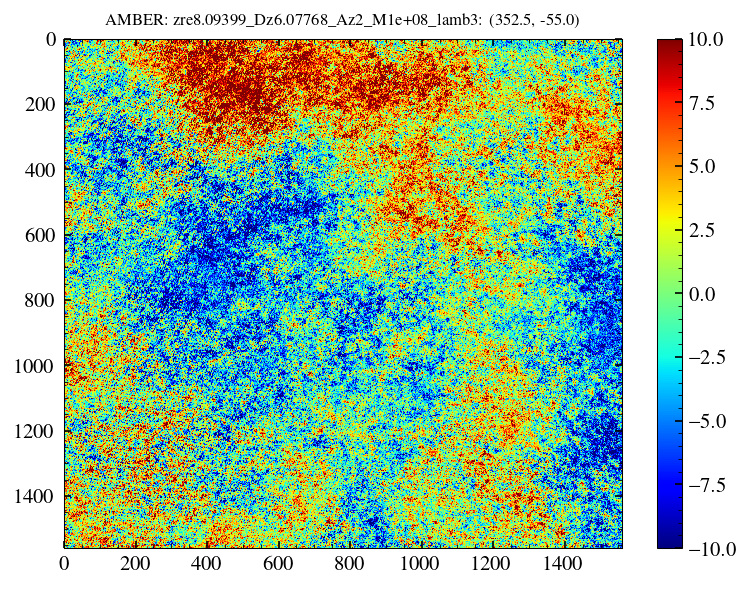

/home/sri/analysis/2020_07/ksz_ps/maps/mapmaking/3G/ksz_4pt_and_others/sims/AMBER/src/Nm1d512_box1000_ionfrac0.05-0.95_z5-40-0.2_nside8192/for_sim_comparisons_ksz/seed1/zre8.46139_Dz4.32245_Az2.5_M1e+08_lamb3_nside8192/cmb/map_ksz_nside=8192.fits
	amber/Nm1d512_box1000_ionfrac0.05-0.95_z5-40-0.2_nside8192/for_sim_comparisons_ksz/seed1/zre8.46139_Dz4.32245_Az2.5_M1e+08_lamb3_nside8192/cmb/map_ksz_nside=8192.npy


<Figure size 900x600 with 0 Axes>

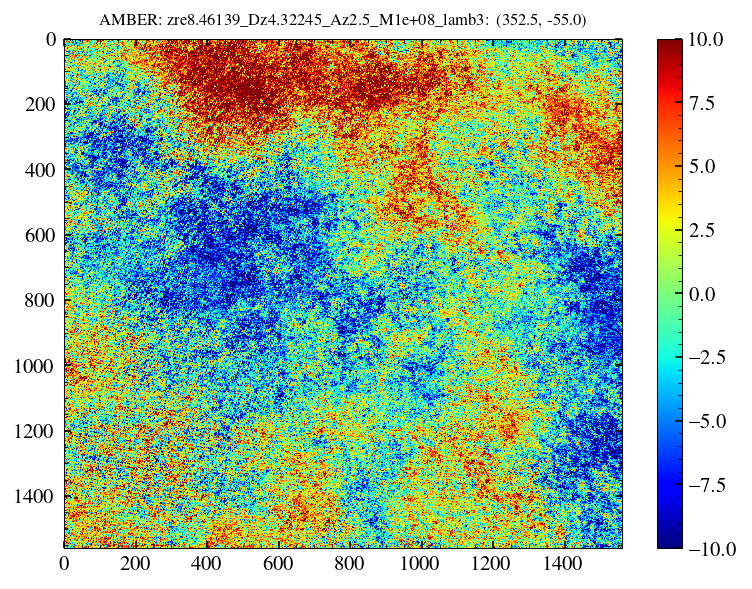

/home/sri/analysis/2020_07/ksz_ps/maps/mapmaking/3G/ksz_4pt_and_others/sims/AMBER/src/Nm1d512_box1000_ionfrac0.05-0.95_z5-40-0.2_nside8192/for_sim_comparisons_ksz/seed1/zre8.46139_Dz4.32245_Az2_M1e+08_lamb3_nside8192/cmb/map_ksz_nside=8192.fits
	amber/Nm1d512_box1000_ionfrac0.05-0.95_z5-40-0.2_nside8192/for_sim_comparisons_ksz/seed1/zre8.46139_Dz4.32245_Az2_M1e+08_lamb3_nside8192/cmb/map_ksz_nside=8192.npy


<Figure size 900x600 with 0 Axes>

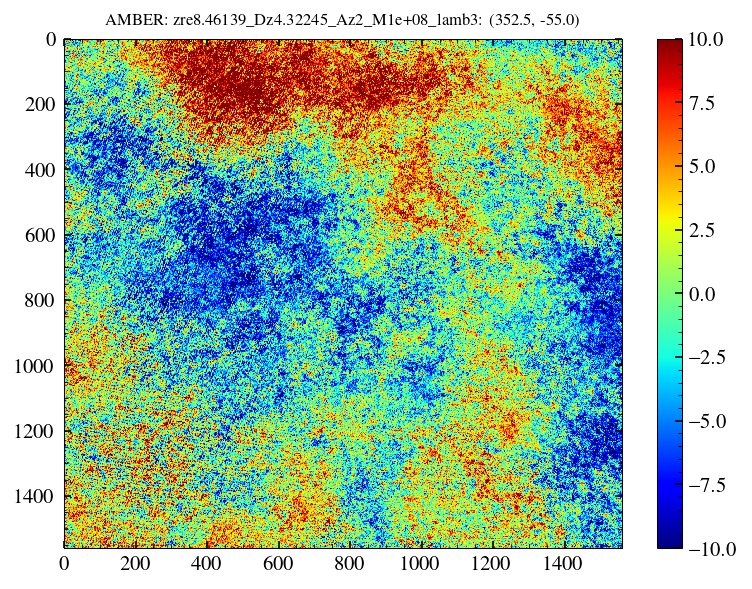

/home/sri/analysis/2020_07/ksz_ps/maps/mapmaking/3G/ksz_4pt_and_others/sims/AMBER/src/Nm1d512_box1000_ionfrac0.05-0.95_z5-40-0.2_nside8192/for_sim_comparisons_ksz/seed1/zre8.46139_Dz4.97214_Az2.5_M1e+08_lamb3_nside8192/cmb/map_ksz_nside=8192.fits
	amber/Nm1d512_box1000_ionfrac0.05-0.95_z5-40-0.2_nside8192/for_sim_comparisons_ksz/seed1/zre8.46139_Dz4.97214_Az2.5_M1e+08_lamb3_nside8192/cmb/map_ksz_nside=8192.npy


<Figure size 900x600 with 0 Axes>

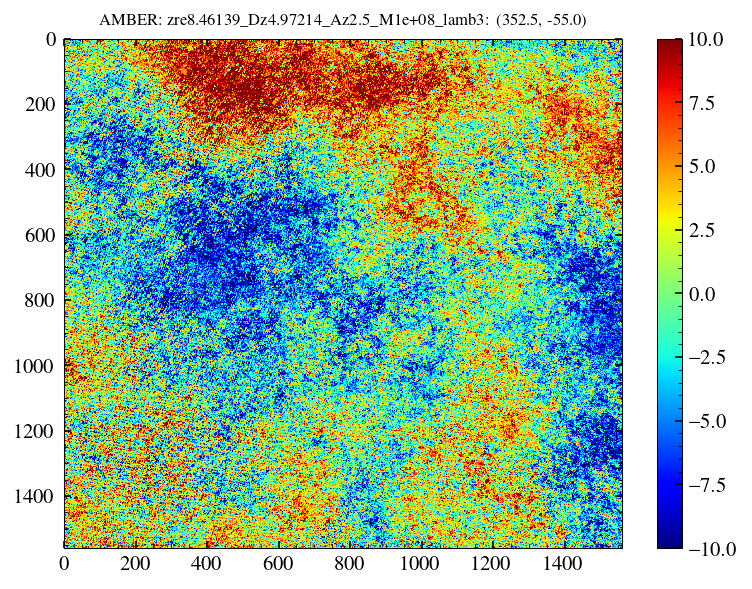

/home/sri/analysis/2020_07/ksz_ps/maps/mapmaking/3G/ksz_4pt_and_others/sims/AMBER/src/Nm1d512_box1000_ionfrac0.05-0.95_z5-40-0.2_nside8192/for_sim_comparisons_ksz/seed1/zre8.46139_Dz4.97214_Az2_M1e+08_lamb3_nside8192/cmb/map_ksz_nside=8192.fits
	amber/Nm1d512_box1000_ionfrac0.05-0.95_z5-40-0.2_nside8192/for_sim_comparisons_ksz/seed1/zre8.46139_Dz4.97214_Az2_M1e+08_lamb3_nside8192/cmb/map_ksz_nside=8192.npy


<Figure size 900x600 with 0 Axes>

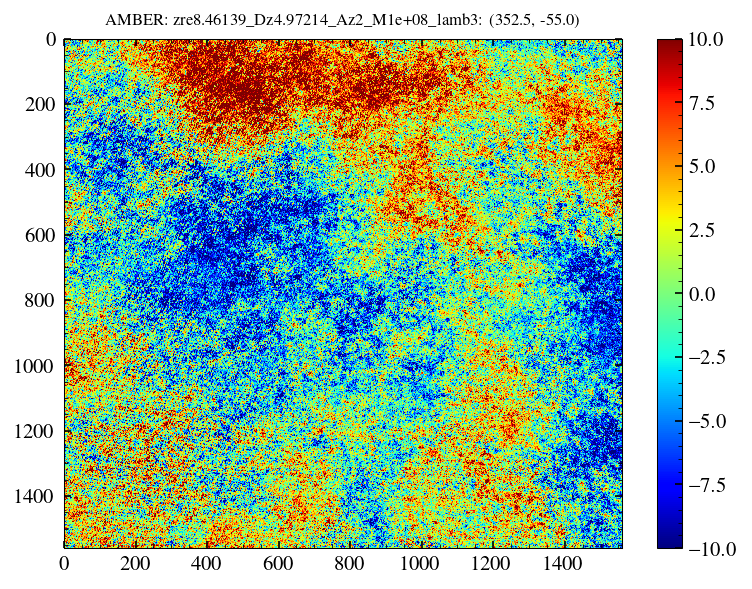

/home/sri/analysis/2020_07/ksz_ps/maps/mapmaking/3G/ksz_4pt_and_others/sims/AMBER/src/Nm1d512_box1000_ionfrac0.05-0.95_z5-40-0.2_nside8192/for_sim_comparisons_ksz/seed1/zre9.44614_Dz4.94372_Az2.5_M1e+08_lamb3_nside8192/cmb/map_ksz_nside=8192.fits
	amber/Nm1d512_box1000_ionfrac0.05-0.95_z5-40-0.2_nside8192/for_sim_comparisons_ksz/seed1/zre9.44614_Dz4.94372_Az2.5_M1e+08_lamb3_nside8192/cmb/map_ksz_nside=8192.npy


<Figure size 900x600 with 0 Axes>

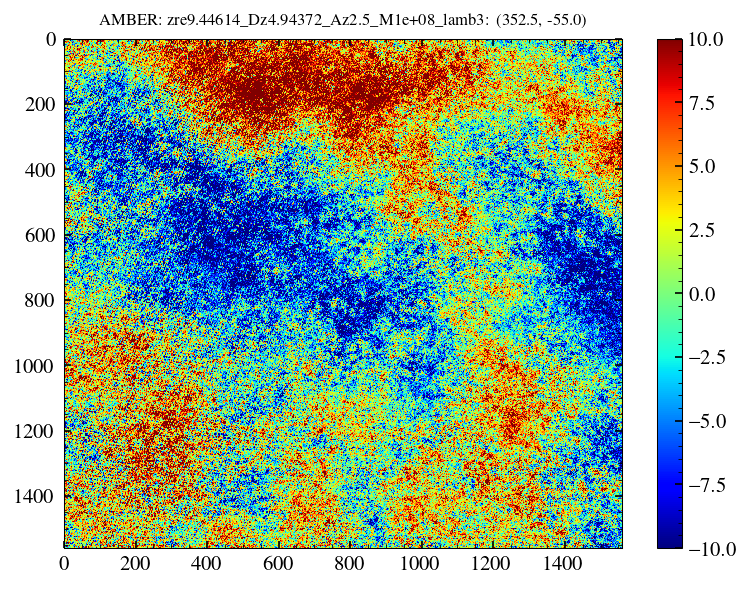

/home/sri/analysis/2020_07/ksz_ps/maps/mapmaking/3G/ksz_4pt_and_others/sims/AMBER/src/Nm1d512_box1000_ionfrac0.05-0.95_z5-40-0.2_nside8192/for_sim_comparisons_ksz/seed1/zre9.44614_Dz4.94372_Az2_M1e+08_lamb3_nside8192/cmb/map_ksz_nside=8192.fits
	amber/Nm1d512_box1000_ionfrac0.05-0.95_z5-40-0.2_nside8192/for_sim_comparisons_ksz/seed1/zre9.44614_Dz4.94372_Az2_M1e+08_lamb3_nside8192/cmb/map_ksz_nside=8192.npy


<Figure size 900x600 with 0 Axes>

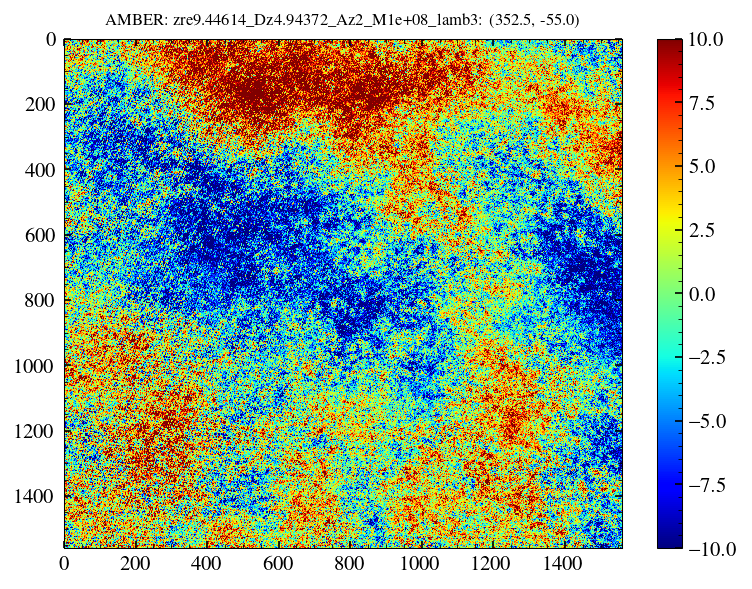


All done



In [22]:
print(searchstr)
flist = glob.glob( searchstr )
print('\nToal files = %s\n' %( len(flist) ) )

for fname in flist:
    print(fname)
    opfname = fname.replace('.fits', '.npy').replace(sim_fd, op_fd)
    hmap = H.read_map(fname) * 1e6 #in uK now
    
    if which_sim == 'amber':
        hmap = hmap * tcmb
        
    
    #H.mollview( hmap * 1e6, min = -.1, max = .1 ); show(); sys.exit()
    
    ##curr_smap = H.gnomview(hmap, rot=[ra0, dec0], xsize=boxsize, reso=reso_arcmin, return_projected_map=True); close()
    if (1):
        curr_smap = extract_cutouts(hmap, reso_arcmin = reso_arcmin, ny = boxsize, nx = boxsize, proj = proj, ra0 = ra0, dec0 = dec0)
        curr_smap = curr_smap * 1e3
    curr_smap = np.asarray( curr_smap ) - np.mean(curr_smap)    
    print('\t%s' %(opfname)); ##sys.exit()
    np.save(opfname, curr_smap)
    
    if which_sim == 'amber':
        tit_str = fname.split('/')[-3].replace('_nside8192', '')
        tit_str = 'AMBER: %s: (%s, %s)' %(tit_str, ra0, dec0)
    elif which_sim == '21cmfast':
        tit_str = fname.split('/')[-1]
        tit_str = '21cmFAST: %s: (%s, %s)' %(tit_str, ra0, dec0)

    clf()
    figure(figsize = (6., 4.5))
    ax = subplot(111)
    imshow(curr_smap, vmin = -10., vmax = 10., aspect = 'auto'); colorbar(); 
    title(tit_str, fontsize = 8); 
    show(); ##sys.exit()

print('\nAll done\n')

In [ ]:
'''
tmpmapfname = 'tmp_partial.fits'
masked_inds = np.where(hmap == 0.)[0]
hmap[masked_inds] = H.UNSEEN
H.write_map(tmpmapfname, hmap, partial = True)
'''